Symbolic Integration Result:  x**3 + x**2 + 2*x
N = 10 Approximation = 325.000000000000
N = 20 Approximation = 321.250000000000
N = 40 Approximation = 320.312500000000
N = 80 Approximation = 320.078125000000
N = 160 Approximation = 320.019531250000
N = 320 Approximation = 320.004882812500
N = 640 Approximation = 320.001220703125
N = 1280 Approximation = 320.000305175781


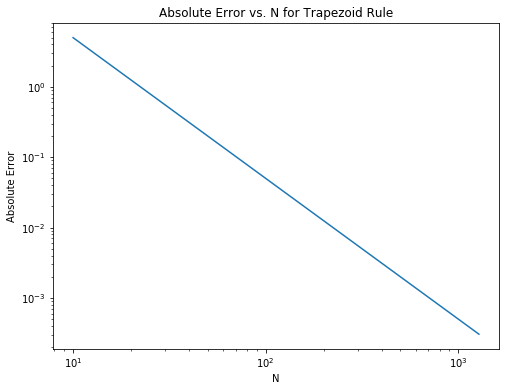

In [2]:
#Question 2a
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Define the symbol for integration
x = symbols('x')

# Define the function to be integrated symbolically
f = 3*x**2 + 2*x + 2

# Part 1: Symbolic Integration
# Compute the symbolic integral of the function
F = integrate(f, x)
print("Symbolic Integration Result: ", F)

# Part 2: Numerical Integration using Trapezoid Rule
# Define the integration limits and a list of different partition sizes (N)
a = -4
b = 6
N = [10, 20, 40, 80, 160, 320, 640, 1280]
I = []  # To store the numerical approximations

# Loop through different values of N and calculate the approximations
for n in N:
    h = (b - a) / n  # Calculate the step size
    x_vals = np.linspace(a, b, n+1)  # Generate equally spaced x values
    y_vals = [f.subs(x, x_val) for x_val in x_vals]  # Evaluate the function at x values
    y_vals[0] /= 2  # Adjust the first and last values for the trapezoid rule
    y_vals[-1] /= 2
    I.append(h * np.sum(y_vals))  # Calculate the approximation using the trapezoid rule
    print("N =", n, "Approximation =", I[-1])

# Part 3: Plot the absolute error
# Calculate the exact integral value
I_exact = F.subs(x, b) - F.subs(x, a)

# Calculate the absolute error for each approximation
error = np.abs(I_exact - np.array(I))

# Create a plot to visualize the absolute error
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N, error)
ax.set_xscale('log')  # Set the x-axis to a logarithmic scale
ax.set_yscale('log')  # Set the y-axis to a logarithmic scale
ax.set_xlabel('N')  # Label for the x-axis
ax.set_ylabel('Absolute Error')  # Label for the y-axis
ax.set_title('Absolute Error vs. N for Trapezoid Rule')  # Title for the plot
plt.show()  # Display the plot

f_xy(x, y) =  -(sin(x) + 2*cos(x))*exp(x)*sin(x)*sin(y)
f_xy(2, 3) =  -0.0730121966594062
Numerical Differentiation Result (h = 0.1): -0.00688582152443606
Numerical Differentiation Result (h = 0.01): -0.000729703465585096
Numerical Differentiation Result (h = 0.001): -0.0000730117781788664
Numerical Differentiation Result (h = 0.0001): -0.00000730121962888575


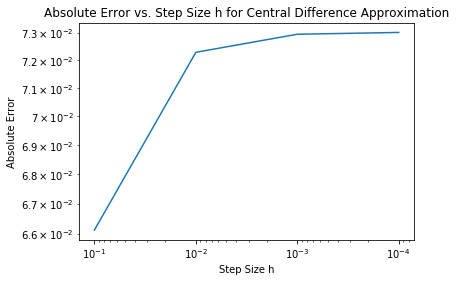

In [3]:
#Question 2b
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols for differentiation
x, y = symbols('x y')

# Define the function to be differentiated
f = sin(x)**2 * exp(x) * cos(y)

# Task 1: Find the closed form expression of f_xy(x, y)
f_xy = diff(f, x, y)  # Calculate the second mixed partial derivative
print("f_xy(x, y) = ", f_xy)

# Task 2: Find f_xy(2, 3) with sympy and take 15 significant digits
f_xy_exact = f_xy.subs([(x, 2), (y, 3)])  # Substitute x=2 and y=3 into the expression
f_xy_exact = N(f_xy_exact, 15)  # Convert to a numerical value with 15 significant digits
print("f_xy(2, 3) = ", f_xy_exact)

# Task 3: Approximate f_xy(2, 3) using central difference approximation
x0 = 2
y0 = 3
h = [0.1, 0.01, 0.001, 0.0001]  # List of different step sizes
f_xy_approx = []  # To store the numerical approximations

# Loop through different step sizes and calculate the approximations
for i in range(len(h)):
    f_xplus_h_yplus_h = f.subs([(x, x0+h[i]), (y, y0+h[i])])  # f(x0 + h, y0 + h)
    f_xplus_h_yminus_h = f.subs([(x, x0+h[i]), (y, y0-h[i])])  # f(x0 + h, y0 - h)
    f_xminus_h_yplus_h = f.subs([(x, x0-h[i]), (y, y0+h[i])])  # f(x0 - h, y0 + h)
    f_xminus_h_yminus_h = f.subs([(x, x0-h[i]), (y, y0-h[i])])  # f(x0 - h, y0 - h)
    f_xy_approx.append((f_xplus_h_yplus_h - f_xplus_h_yminus_h - f_xminus_h_yplus_h + f_xminus_h_yminus_h) / (4 * h[i]))
    print("Numerical Differentiation Result (h = {}): {}".format(h[i], f_xy_approx[i]))

# Task 4: Plot the absolute error
error = np.abs(f_xy_exact - np.array(f_xy_approx))
plt.plot(h, error)
plt.gca().invert_xaxis()  # Invert x-axis to show decreasing step size
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xlabel('Step Size h')  # Label for the x-axis
plt.ylabel('Absolute Error')  # Label for the y-axis
plt.title('Absolute Error vs. Step Size h for Central Difference Approximation')  # Title for the plot
plt.show()  # Display the plot

In [4]:
#Question 3
import pandas as pd
import numpy as np

# Task 1: Create a 3x4 pandas DataFrame with random integers
towns = ['Hempstead', 'Babylon', 'Islip', 'Brookhaven']
rows = ['Population in 2099', 'Population in 2300', 'Population in 2400']

# Generate random integers in the range [1000, 10000] to fill the DataFrame
data = np.random.randint(1000, 10001, size=(3, 4))

# Create a DataFrame with random data, using 'rows' as index and 'towns' as columns
df = pd.DataFrame(data, index=rows, columns=towns)

# Print the DataFrame
print(df)

# Task 2: Output the entire DataFrame and the value in the cell of row #1 under the Hempstead column
print(df)  # Output the entire DataFrame

# Access and print the value in the cell of row #1 (Population in 2099) under the 'Hempstead' column
print("Value in the cell of row #1 under the Hempstead column: ", df.loc['Population in 2099', 'Hempstead'])

# Task 3: Add a new column named Riverhead and output the entire DataFrame again
# Calculate the new 'Riverhead' column by adding the 'Islip' and 'Brookhaven' columns
df['Riverhead'] = df['Islip'] + df['Brookhaven']

# Output the DataFrame again with the new 'Riverhead' column
print(df)

                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2200     5449   2269        4843
Population in 2300       2094     5546   4684        4278
Population in 2400       2293     3051   3503        5888
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2200     5449   2269        4843
Population in 2300       2094     5546   4684        4278
Population in 2400       2293     3051   3503        5888
Value in the cell of row #1 under the Hempstead column:  2200
                    Hempstead  Babylon  Islip  Brookhaven  Riverhead
Population in 2099       2200     5449   2269        4843       7112
Population in 2300       2094     5546   4684        4278       8962
Population in 2400       2293     3051   3503        5888       9391


In [5]:
#Question 4
import pandas as pd

# Part 0: Read the CSV file into a dataframe
df = pd.read_csv('customers-100 (1).csv')  # Read the CSV file into a DataFrame called 'df'

# Part 1: Arrange the data in alphabetical order based on the last name
df = df.sort_values(by='Last Name')  # Sort the DataFrame based on the 'Last Name' column
print(df.head())  # Display the first few rows of the sorted DataFrame

# Part 2: Count the number of customers whose subscription date is in 2021
# Filter rows where the 'Subscription Date' column contains the string '2021'
# and count the number of rows matching this condition
count = df[df['Subscription Date'].str.contains('2021')].shape[0]

# Print the count of customers who subscribed in 2021
print("Number of customers subscribed in 2021: ", count)

    Index      Customer Id First Name Last Name                Company  \
67     68  a014Ec1b9FccC1E        Tom  Alvarado    Donaldson-Dougherty   
96     97  CeD220bdAaCfaDf       Lynn  Atkinson  Ware, Burns and Oneal   
92     93  aAb6AFc7AfD0fF3     Collin     Ayers          Lamb-Peterson   
0       1  DD37Cf93aecA6Dc     Sheryl    Baxter        Rasmussen Group   
15     16  8cad0b4CBceaeec    Miranda   Beasley     Singleton and Sons   

                City    Country             Phone 1                Phone 2  \
67  South Sophiaberg   Kiribati  (585)606-2980x2258      730-797-3594x5614   
96      New Bradview  Sri Lanka     +1-846-706-2218           605.413.3198   
92      South Lonnie   Anguilla    404-645-5351x012  001-257-582-8850x8516   
0       East Leonard      Chile        229.077.5154       397.884.0519x718   
15      Desireeshire       Oman    540.085.3135x185  +1-600-462-6432x21881   

                            Email Subscription Date  \
67  nicholsonnina@montgomery.in

In [6]:
#Question 5
import numpy as np

# Part A

# Define a function called 'LUdecomposition' that takes a matrix 'A' as input
def LUdecomposition(A):
    n = A.shape[0]  # Get the number of rows (assuming A is a square matrix)
    L = np.eye(n)  # Initialize an identity matrix of the same size as A as 'L'
    U = A.copy()  # Create a copy of matrix 'A' as 'U'

    # Loop through the rows of 'U' for LU decomposition
    for i in range(n - 1):
        if U[i, i] == 0:
            raise ValueError("Zero pivot encountered. Pivoting is required.")  # Check for zero pivot
        for j in range(i + 1, n):
            L[j, i] = U[j, i] / U[i, i]  # Calculate the multiplier for the lower triangular matrix
            U[j, i:] -= L[j, i] * U[i, i:]  # Perform row operations to eliminate elements in 'U'

    # Return the lower triangular matrix 'L' and the upper triangular matrix 'U'
    return L, U

# Create several random matrices for testing
A1 = np.random.rand(3, 3)
A2 = np.random.rand(4, 4)
A3 = np.random.rand(5, 5)

# Obtain the L and U matrices for each matrix and perform a matrix multiplication to check the decomposition
L1, U1 = LUdecomposition(A1)
print("A1: \n", A1)
print("L1: \n", L1)
print("U1: \n", U1)
print("A1 = L1U1: \n", np.allclose(A1, np.dot(L1, U1)))  # Check if A1 equals the product of L1 and U1

L2, U2 = LUdecomposition(A2)
print("A2: \n", A2)
print("L2: \n", L2)
print("U2: \n", U2)
print("A2 = L2U2: \n", np.allclose(A2, np.dot(L2, U2)))  # Check if A2 equals the product of L2 and U2

L3, U3 = LUdecomposition(A3)
print("A3: \n", A3)
print("L3: \n", L3)
print("U3: \n", U3)
print("A3 = L3U3: \n", np.allclose(A3, np.dot(L3, U3)))  # Check if A3 equals the product of L3 and U3

# Part B

# Define a function called 'pivoting' that takes a matrix 'A' as input
def pivoting(A):
    n = A.shape[0]  # Get the number of rows (assuming A is a square matrix)
    P = np.eye(n)  # Initialize an identity matrix of the same size as A as 'P'

    # Loop through the rows of 'A' for row pivoting
    for i in range(n - 1):
        # Find the row index with the maximum absolute value in column 'i'
        max_row = i + np.argmax(np.abs(A[i:, i]))
        if max_row != i:
            # Swap the rows of the permutation matrix 'P' to perform row pivoting
            P[[i, max_row]] = P[[max_row, i]]

    return P

# Create an example matrix 'A' that would raise an error in LU decomposition
A = np.array([[0, 1], [1, 0]])

try:
    L, U = LUdecomposition(A)  # Attempt LU decomposition (will raise an error)
except ValueError as e:
    print(e)  # Print the error message

# Use pivoting() to find permutation matrix 'P', and find the pure LU decomposition of PA
P = pivoting(A)  # Find the permutation matrix 'P' to handle zero pivot
PA = np.dot(P, A)  # Apply permutation 'P' to 'A'
L, U = LUdecomposition(PA)  # Perform LU decomposition on PA
print("A: \n", A)
print("P: \n", P)
print("PA: \n", PA)
print("L: \n", L)
print("U: \n", U)
print("PA = LU: \n", np.allclose(PA, np.dot(L, U)))  # Check if PA equals LU

A1: 
 [[0.45886828 0.81845248 0.67446866]
 [0.69874299 0.04985173 0.20106452]
 [0.31851339 0.02564607 0.13094223]]
L1: 
 [[1.         0.         0.        ]
 [1.52275286 1.         0.        ]
 [0.69412815 0.45339566 1.        ]]
U1: 
 [[ 0.45886828  0.81845248  0.67446866]
 [ 0.         -1.19644913 -0.82598457]
 [ 0.          0.          0.03727236]]
A1 = L1U1: 
 True
A2: 
 [[0.53335926 0.73496822 0.58448395 0.25956584]
 [0.2576353  0.40574679 0.10510052 0.59798921]
 [0.95609167 0.12521351 0.10766298 0.39689041]
 [0.48450951 0.81892359 0.33855186 0.61233949]]
L2: 
 [[  1.           0.           0.           0.        ]
 [  0.4830427    1.           0.           0.        ]
 [  1.79258472 -23.50441585   1.           0.        ]
 [  0.90841117   2.98211915  -0.06583178   1.        ]]
U2: 
 [[ 5.33359263e-01  7.34968217e-01  5.84483945e-01  2.59565838e-01]
 [ 0.00000000e+00  5.07257570e-02 -1.77230182e-01  4.72607825e-01]
 [ 0.00000000e+00  0.00000000e+00 -5.10576591e+00  1.10399675e+01]

In [7]:
#Question 6
import numpy as np

# Fix the random seed (last digit of your ID)
np.random.seed(7)

# 1. Construct a random 5x5 matrix P and normalize each row
P = np.random.rand(5, 5)
P /= P.sum(axis=1, keepdims=True)

# 2. Construct a random size-5 vector p and normalize it
p = np.random.rand(5)
p /= p.sum()

# Apply the transition rule 50 times to obtain p_50
for i in range(50):
    p = np.dot(P.T, p)

# 3. Compute the eigenvector v of P^T corresponding to the eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(P.T)
v = eigenvectors[:, np.isclose(eigenvalues, 1)]

# Scale the eigenvector v so that its components sum to 1
v /= v.sum()

# 4. Compute the component-wise difference between p_50 and the stationary distribution v
diff = np.abs(p - v)

# Check if the difference is less than 1e-5 for all components
if np.all(diff < 1e-5):
    print("The component-wise difference between p_50 and the stationary distribution is less than 1e-5.")
else:
    print("The component-wise difference between p_50 and the stationary distribution is greater than or equal to 1e-5.")

The component-wise difference between p_50 and the stationary distribution is greater than or equal to 1e-5.
